In [146]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import Regularizer
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
%matplotlib inline

# Data Cleaning and Analyst

In [214]:
dataset= pd.read_csv('data/laptop_price.csv')
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [8]:
dataset.describe(include='O')

,Company,Product,TypeName,ScreenResolution,CPU_Company,CPU_Type,Memory,GPU_Company,GPU_Type,OpSys
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,40,3,93,39,4,106,9
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel,Core i5 7200U,256GB SSD,Intel,HD Graphics 620,Windows 10
freq,291,30,707,505,1214,193,412,704,280,1048


In [7]:
dataset.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [12]:
#the cheapiest laptope

cheap_laptope= dataset.sort_values(by='Price (Euro)')

cheap_laptope.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,1366x768,Intel,Celeron Dual Core 3205U,1.50,2,32GB SSD,Intel,HD Graphics,Chrome OS,1.30,174.0
20,Asus,Vivobook E200HA,Netbook,11.6,1366x768,Intel,Atom x5-Z8350,1.44,2,32GB Flash Storage,Intel,HD Graphics 400,Windows 10,0.98,191.9
1120,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel,Atom X5-Z8350,1.44,4,32GB Flash Storage,Intel,HD Graphics 400,Windows 10,1.35,196.0
31,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),Notebook,14.0,1366x768,AMD,E-Series E2-6110,1.50,2,32GB Flash Storage,AMD,Radeon R2,Windows 10,1.65,199.0
290,Acer,Chromebook C910-C2ST,Notebook,15.6,1366x768,Intel,Celeron Dual Core 3205U,1.50,2,16GB SSD,Intel,HD Graphics,Chrome OS,2.19,199.0


In [11]:

#the most expensive laptope

expensive_laptope= dataset.sort_values(by='Price (Euro)',ascending=False)

expensive_laptope.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel,Core i7 7820HK,2.9,32,1TB SSD,Nvidia,GeForce GTX 1080,Windows 10,3.49,6099.0
830,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel,Core i7 7820HK,2.9,32,512GB SSD,Nvidia,GeForce GTX 1080,Windows 10,3.49,5499.0
610,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel,Xeon E3-1535M v6,3.1,32,1TB SSD,Nvidia,Quadro M2200M,Windows 10,2.50,4899.0
749,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel,Xeon E3-1535M v5,2.9,16,256GB SSD,Nvidia,Quadro M2000M,Windows 7,3.00,4389.0
1066,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel,Core i7 6820HK,2.7,64,1TB SSD,Nvidia,GeForce GTX 980,Windows 10,3.58,3975.0


In [15]:
expensive_company= dataset.groupby(['Company','TypeName']).agg(
    AvgPrice=('Price (Euro)','mean'),
    Count=('Company','count')
)
# wich company sell the most expensive laptop 
expensive_company.sort_values(by='AvgPrice',ascending=False)

expensive_company.head(10)


AvgPrice  Count
Company TypeName                              
Acer    2 in 1 Convertible   698.751250      8
        Gaming              1468.125000      8
        Netbook              306.000000      5
        Notebook             546.748684     76
        Ultrabook            890.500000      4
Apple   Ultrabook           1564.198571     21
Asus    2 in 1 Convertible   976.385385     13
        Gaming              1720.005370     54
        Netbook              266.200000      4
        Notebook             632.336825     63

In [17]:
# wich company sell the most cheapest laptop 

cheapest_company=expensive_company.sort_values(by='AvgPrice',ascending=True)

cheapest_company.head(10)

AvgPrice  Count
Company  TypeName                             
Vero     Notebook            217.425000      4
Asus     Netbook             266.200000      4
Samsung  Netbook             269.000000      1
Mediacom Notebook            294.333333      6
         2 in 1 Convertible  299.000000      1
Acer     Netbook             306.000000      5
Chuwi    Notebook            314.296667      3
Dell     Netbook             519.500000      2
Acer     Notebook            546.748684     76
Asus     Notebook            632.336825     63

In [23]:
#Wich company has more Categories
has_more= dataset.groupby(['Company']).agg(
    AvgPrice=('Price (Euro)','mean'),
    Count=('Company','count')
)
has_more=has_more.sort_values(by='Count',ascending=False)
has_more.head()

,AvgPrice,Count
Company,,
Dell,1199.225120,291
Lenovo,1093.862215,289
HP,1080.314664,268
Asus,1123.829737,152
Acer,633.464455,101


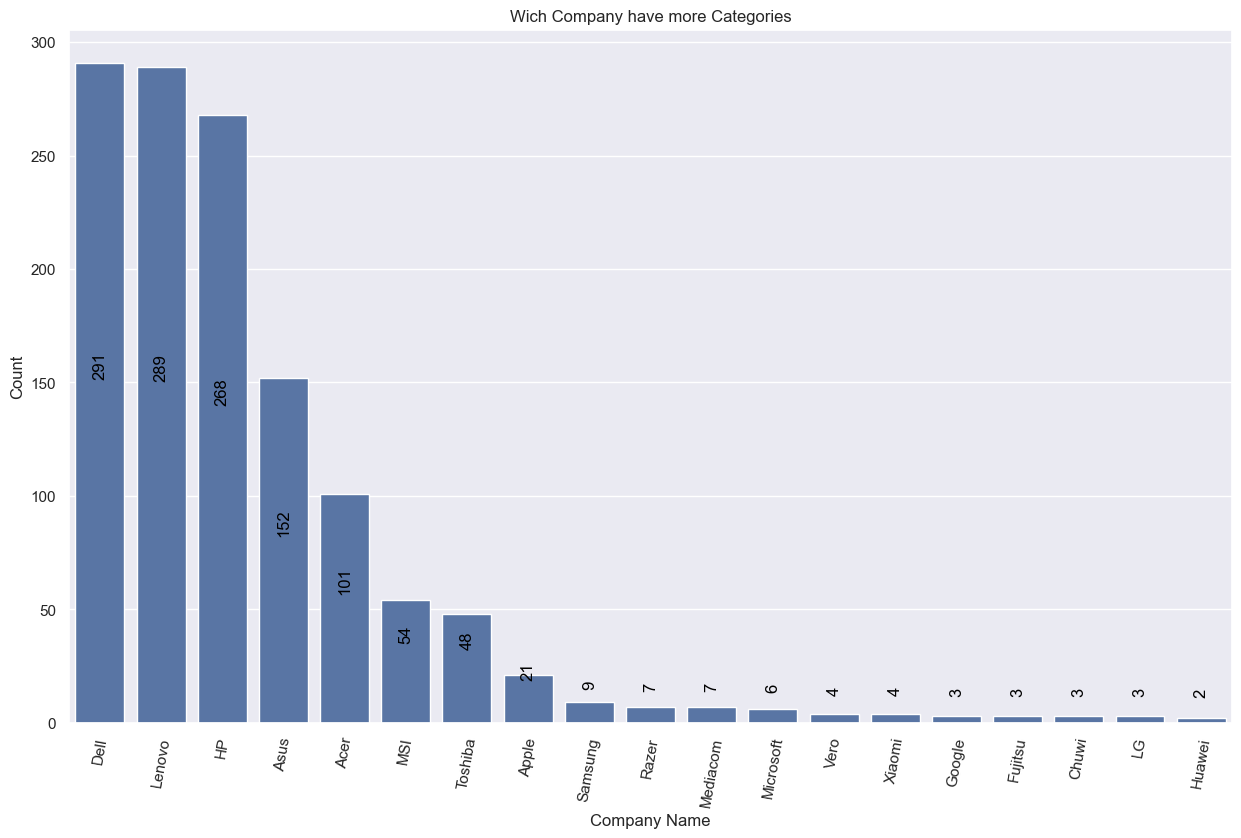

In [35]:
plt.figure(figsize=(15,9))
sns.set_theme()
ax=sns.barplot(data=has_more,x=has_more.index,y=has_more['Count'])
plt.xticks(rotation=80)
plt.xlabel('Company Name')

for container in ax.containers:
    ax.bar_label(container,rotation=90,padding=20,label_type='center',color='black')

plt.title('Wich Company have more Categories')
plt.show()

Text(0.5, 1.0, 'Price By Weight in Kg')

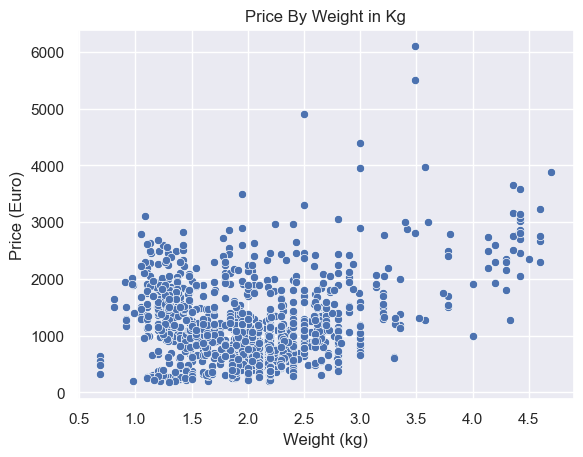

In [37]:
sns.scatterplot(x=dataset['Weight (kg)'],y=dataset['Price (Euro)'])
plt.title('Price By Weight in Kg')

Text(0.5, 1.0, 'Price By Cpu with barnd')

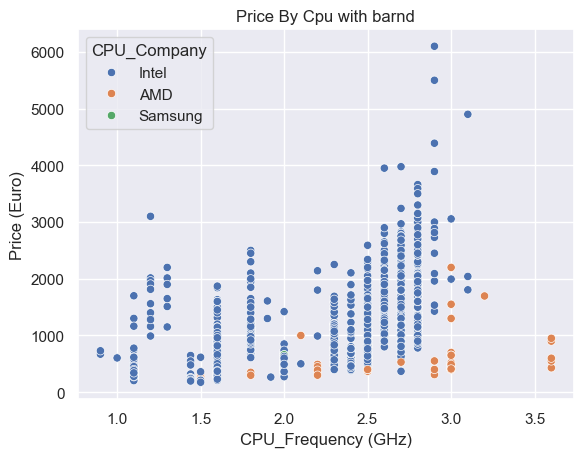

In [38]:
sns.scatterplot(x=dataset['CPU_Frequency (GHz)'],y=dataset['Price (Euro)'],hue=dataset['CPU_Company'])
plt.title('Price By Cpu with barnd')

Text(0.5, 1.0, 'Price By Gpu with barnd')

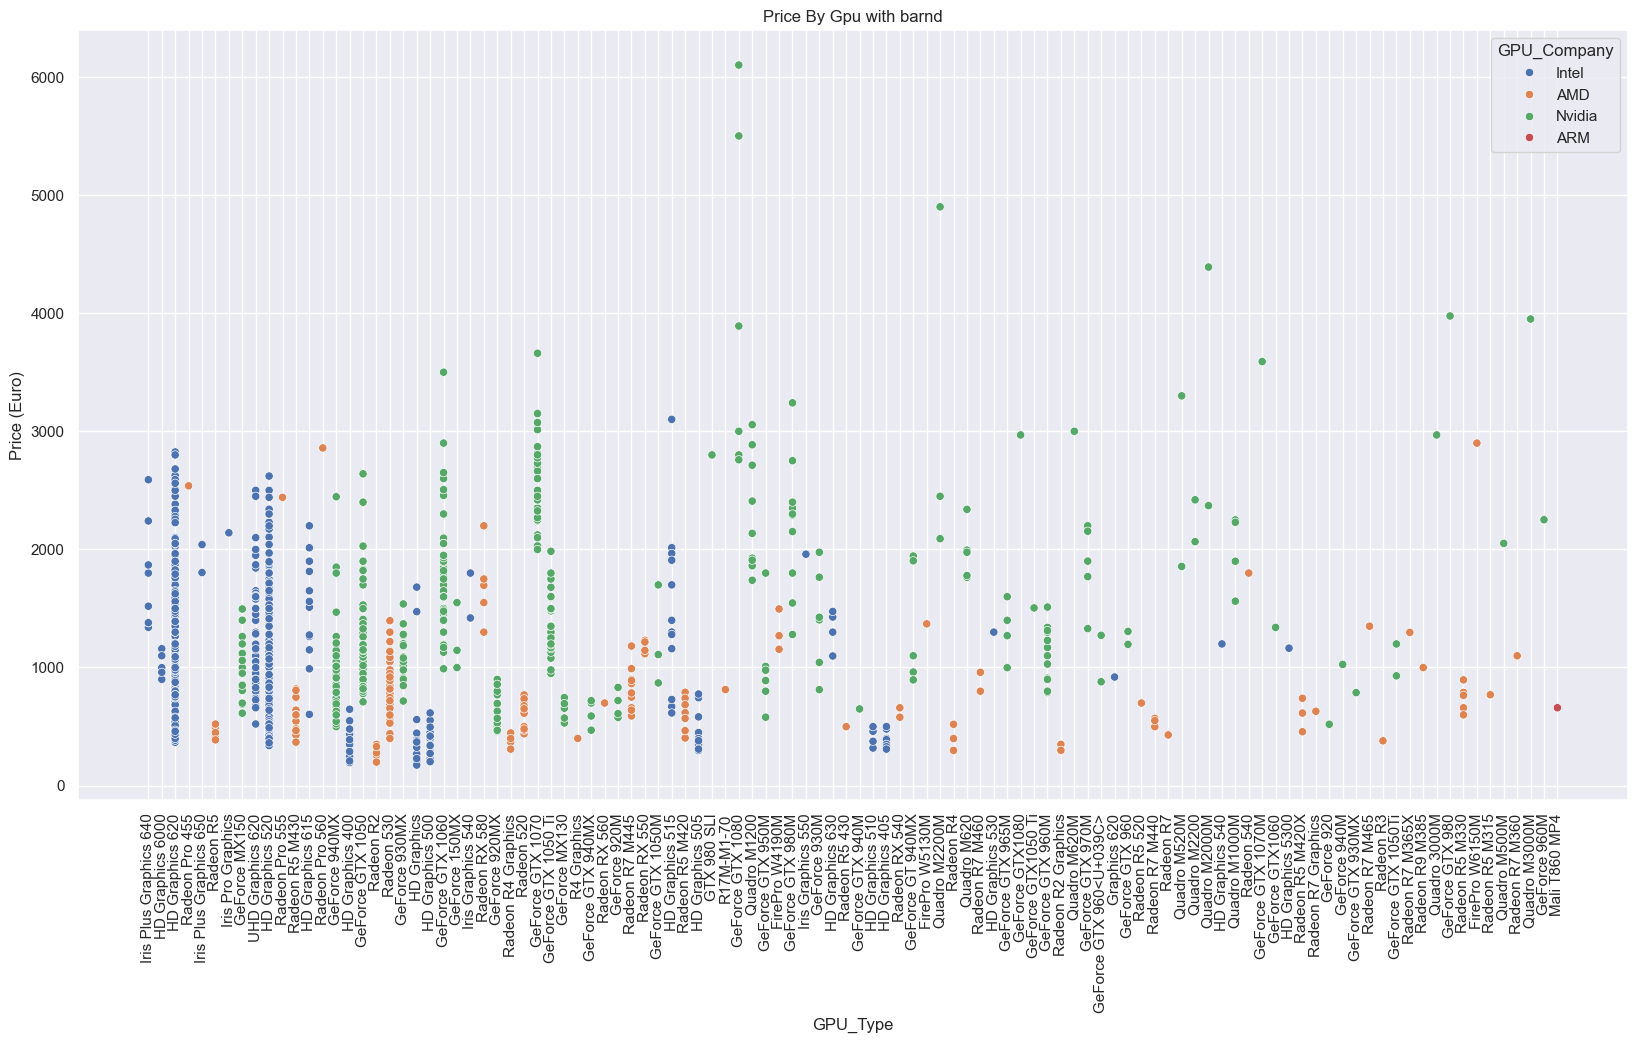

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=dataset['GPU_Type'],y=dataset['Price (Euro)'],hue=dataset['GPU_Company'])
plt.xticks(rotation=90)
plt.title('Price By Gpu with barnd')

c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

Text(0.5, 0, 'GPU Brands')

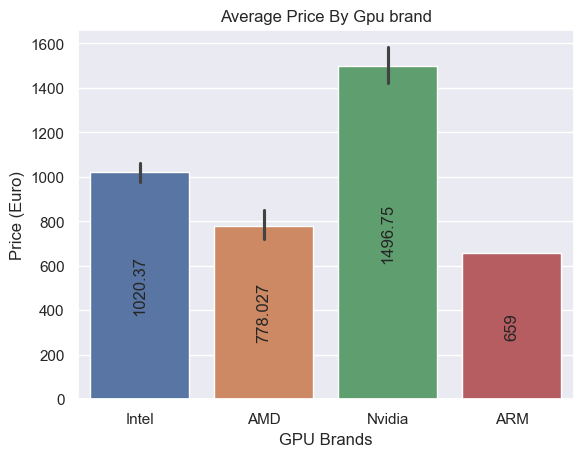

In [47]:
ax=sns.barplot(x=dataset['GPU_Company'],y=dataset['Price (Euro)'],hue=dataset['GPU_Company'])
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90)
plt.title('Average Price By Gpu brand')
plt.xlabel('GPU Brands')

c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

Text(0.5, 0, 'CPU Brands')

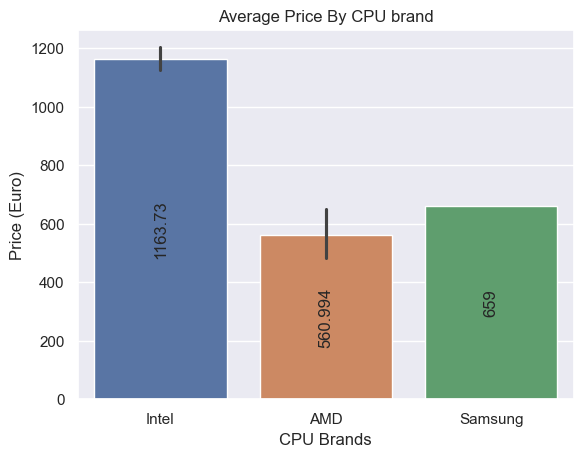

In [49]:
ax=sns.barplot(x=dataset['CPU_Company'],y=dataset['Price (Euro)'],hue=dataset['CPU_Company'])
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90)
plt.title('Average Price By CPU brand')
plt.xlabel('CPU Brands')

# Predict Laptop Price With Regression

In [57]:
dataset.head()


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [193]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

cats=['CPU_Type','Company','CPU_Company','Memory','GPU_Company','GPU_Type','OpSys']
norm=['CPU_Frequency (GHz)','RAM (GB)','Price (Euro)']

for i in cats:
    dataset[i]= le.fit_transform(dataset[i].values)

data= dataset[cats]
data[norm]= dataset[norm]
data.head()

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_244\2479880105.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[norm]= dataset[norm]
C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_244\2479880105.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[norm]= dataset[norm]
C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_244\2479880105.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,CPU_Type,Company,CPU_Company,Memory,GPU_Company,GPU_Type,OpSys,CPU_Frequency (GHz),RAM (GB),Price (Euro)
0,40,1,1,4,2,56,8,2.3,8,1339.69
1,40,1,1,2,2,50,8,1.8,8,898.94
2,46,7,1,16,2,52,4,2.5,8,575.00
3,54,1,1,29,0,76,8,2.7,16,2537.45
4,40,1,1,16,2,57,8,3.1,8,1803.60


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   int64  
 1   CPU_Company          1275 non-null   int64  
 2   CPU_Type             1275 non-null   int64  
 3   Memory               1275 non-null   int64  
 4   GPU_Company          1275 non-null   int64  
 5   GPU_Type             1275 non-null   int64  
 6   OpSys                1275 non-null   int64  
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Price (Euro)         1275 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 99.7 KB


In [66]:
correlation=data.corr()
correlation

,Company,CPU_Company,CPU_Type,Memory,GPU_Company,GPU_Type,OpSys,CPU_Frequency (GHz),RAM (GB),Price (Euro)
Company,1.000000,0.047634,-0.004720,0.057219,0.059911,-0.064761,0.127853,0.133191,0.041771,0.136541
CPU_Company,0.047634,1.000000,0.327164,-0.000449,0.480535,-0.308513,-0.049561,-0.137123,0.102239,0.177881
CPU_Type,-0.004720,0.327164,1.000000,0.027676,0.296056,-0.116222,0.123982,0.219135,0.436243,0.473860
Memory,0.057219,-0.000449,0.027676,1.000000,0.006993,0.056919,0.037335,-0.068223,0.161390,0.198114
GPU_Company,0.059911,0.480535,0.296056,0.006993,1.000000,-0.734300,0.049802,0.169774,0.280375,0.324300
GPU_Type,-0.064761,-0.308513,-0.116222,0.056919,-0.734300,1.000000,0.025113,-0.225074,-0.185136,-0.144787
OpSys,0.127853,-0.049561,0.123982,0.037335,0.049802,0.025113,1.000000,0.219762,0.140002,0.290199
CPU_Frequency (GHz),0.133191,-0.137123,0.219135,-0.068223,0.169774,-0.225074,0.219762,1.000000,0.366254,0.428847
RAM (GB),0.041771,0.102239,0.436243,0.161390,0.280375,-0.185136,0.140002,0.366254,1.000000,0.740287
Price (Euro),0.136541,0.177881,0.473860,0.198114,0.324300,-0.144787,0.290199,0.428847,0.740287,1.000000


Text(0.5, 1.0, 'the Correlation of Price with Other item')

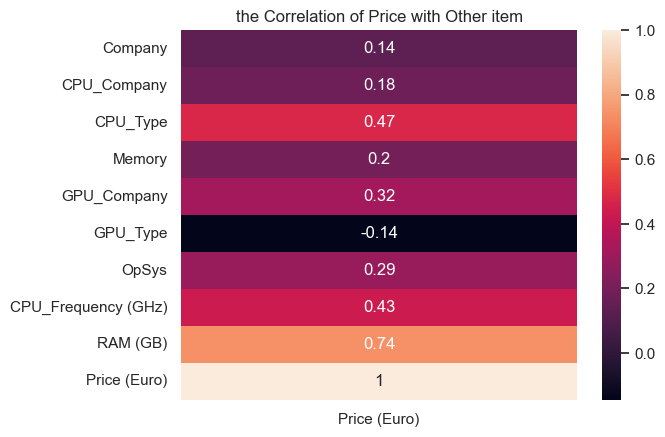

In [70]:
sns.heatmap(correlation[['Price (Euro)']],annot=True)
plt.title('the Correlation of Price with Other item')

In [107]:
#those columns will help to get a good prediction
useful_columns=['CPU_Type', 'Memory', 'GPU_Company', 'CPU_Frequency (GHz)', 'RAM (GB)','Price (Euro)']

In [110]:
model_data=data[useful_columns]
model_data.head()

,CPU_Type,Memory,GPU_Company,CPU_Frequency (GHz),RAM (GB),Price (Euro)
0,40,4,2,2.3,8,1339.69
1,40,2,2,1.8,8,898.94
2,46,16,2,2.5,8,575.00
3,54,29,0,2.7,16,2537.45
4,40,16,2,3.1,8,1803.60


In [79]:
model_data.shape

(1275, 7)

# Training our Model 

In [111]:
data= model_data.drop(['Price (Euro)'],axis=1)
prices= model_data['Price (Euro)']

x_train,x_test,y_train,y_test= train_test_split(data,prices,test_size=0.1)
print(f"x train size : {x_train.shape}")
print(f"y train size : {y_train.shape}")
print(f"x test size : {x_test.shape}")
print(f"y test size : {x_test.shape}")

x train size : (1147, 5)
y train size : (1147,)
x test size : (128, 5)
y test size : (128, 5)


##                                     LinearRegression r2= 0.68

In [158]:
model= LinearRegression()

scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


model.fit(x_train,y_train)
model.score(x_train,y_train)


0.6130014595560294

In [160]:
y_hat=model.predict(x_test)
r2= r2_score(y_test,y_hat)
r2

0.6828271162552212

# Random Forest Regression

In [161]:
model_R=RandomForestRegressor(n_estimators=200)

model_R.fit(x_train,y_train)

model_R.score(x_train,y_train)

0.8590427167070156

In [162]:
y_hat= model_R.predict(x_test)
r2= r2_score(y_test,y_hat)
r2

0.3114366023376405

In [169]:
para={
    'n_estimators':[100,50,120,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10],
    'max_features':['qrt','auto','log2'],

}

cv=GridSearchCV(model_R,param_grid=para,cv=5)
cv.fit(x_train,y_train)

c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-p

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=200),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['qrt', 'auto', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 50, 120, 200]})

In [170]:
model=cv.best_estimator_
model.fit(x_train,y_train)

y_hat= model.predict(x_test)
r2= r2_score(y_test,y_hat)
r2

0.6686020300401478

# Neural Network r2= 0.70

In [171]:
from keras import regularizers
model = Sequential([
    Dense(32, activation='relu', input_shape=(x_train.shape[1],),kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),),  # Define input shape in the first Dense layer
    Dense(32, activation='relu',kernel_regularizer=regularizers.l2(1e-6),),
    Dense(16, activation='relu',kernel_regularizer=regularizers.l2(1e-6),),
    Dense(16, activation='relu',kernel_regularizer=regularizers.l2(1e-6),),
    Dense(1, activation='linear'),
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [172]:

history= model.fit(x_train,y_train,validation_split=0.15,epochs=1000)

Epoch 1/1000
31/31 [==============================] - 3s 39ms/step - loss: 1804948.1250 - mae: 1140.3104 - val_loss: 1616881.7500 - val_mae: 1102.2715
Epoch 2/1000
31/31 [==============================] - 0s 9ms/step - loss: 1799447.7500 - mae: 1137.9944 - val_loss: 1606382.3750 - val_mae: 1097.6720
Epoch 3/1000
31/31 [==============================] - 0s 10ms/step - loss: 1776963.6250 - mae: 1128.6023 - val_loss: 1562333.6250 - val_mae: 1078.9723
Epoch 4/1000
31/31 [==============================] - 0s 8ms/step - loss: 1689532.2500 - mae: 1093.3335 - val_loss: 1410543.3750 - val_mae: 1014.2212
Epoch 5/1000
31/31 [==============================] - 0s 6ms/step - loss: 1441125.2500 - mae: 987.0244 - val_loss: 1032856.1250 - val_mae: 838.4034
Epoch 6/1000
31/31 [==============================] - 0s 5ms/step - loss: 926256.1875 - mae: 751.5004 - val_loss: 463669.4688 - val_mae: 517.4553
Epoch 7/1000
31/31 [==============================] - 0s 5ms/step - loss: 404520.6562 - mae: 459.0385 - 

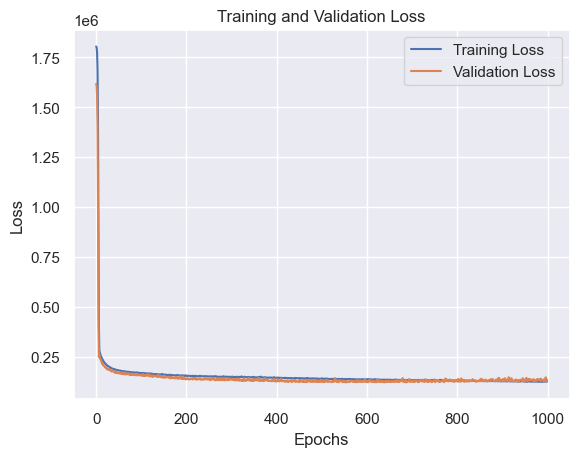

In [173]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


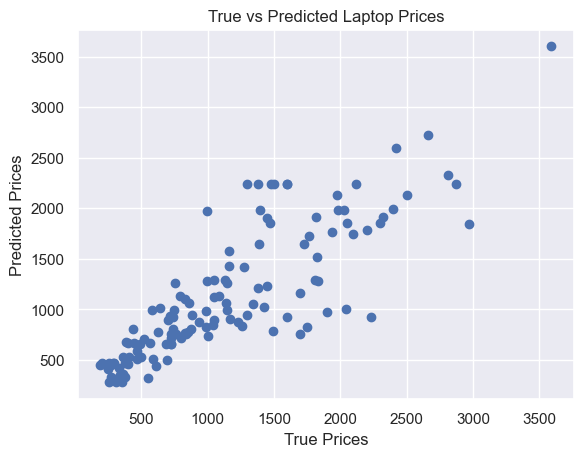

In [174]:
y_pred = model.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Laptop Prices')
plt.show()

In [175]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred)

278.58675756454465

In [176]:
model.evaluate(x_train,y_train)

36/36 [==============================] - 0s 2ms/step - loss: 124953.1406 - mae: 246.1502


[124953.140625, 246.15020751953125]

In [177]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7030964065883909

In [179]:
#'CPU_Type', 'Memory', 'GPU_Company', 'CPU_Frequency (GHz)', 'RAM (GB)'
x_test[0]

array([-0.20850985, -1.69859008,  0.95178588,  0.44792165, -0.16763055])

In [212]:
def get_prediction(cpu_type,Memory,GPU_Company,CPU_Frequency,RAM):
    data= pd.DataFrame()
    

    data['CPU_Type']=le.transform([cpu_type])
    data['Memory']=le.transform([Memory])
    data['GPU_Company']=le.transform([GPU_Company])

    data['CPU_Frequency']=CPU_Frequency
    data['RAM (GB)']=RAM
    
    return model.predict(data)
    

In [222]:
get_prediction('Core i5','128GB SSD','Intel',8,0)

1/1 [==============================] - 0s 129ms/step


array([[2862.4504]], dtype=float32)

In [ ]:
'Core i7 6500U','128GB SSD','Intel',2.54